# app reviews sentiment analysis

# app reviews sentiment analysis means evaluating and understanding the sentiment expressed in user reviws of mobile applications. 

In [19]:
import numpy as np 
import pandas as pd

In [20]:
df = pd.read_csv("C:\\Users\\snehr\\Desktop\\python\\linkedin-reviews.csv")

In [21]:
df

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4
...,...,...
697,"Can't trust, Going to uninstall just for that ...",1
698,It really gets me linked in with my friends. H...,5
699,It lacks most of what makes the other social n...,4
700,Really disappointed in the new version. Seems ...,2


In [22]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


# exploaratory data analysis

# we will start by analyziz the distributions of rating . it will be provide inside into the overall sentiment of the reviws . then we can explore further , such as analyziz the length of reviews , and possibly insight from the text of the reviews .

# plotting the distributions of ratings 

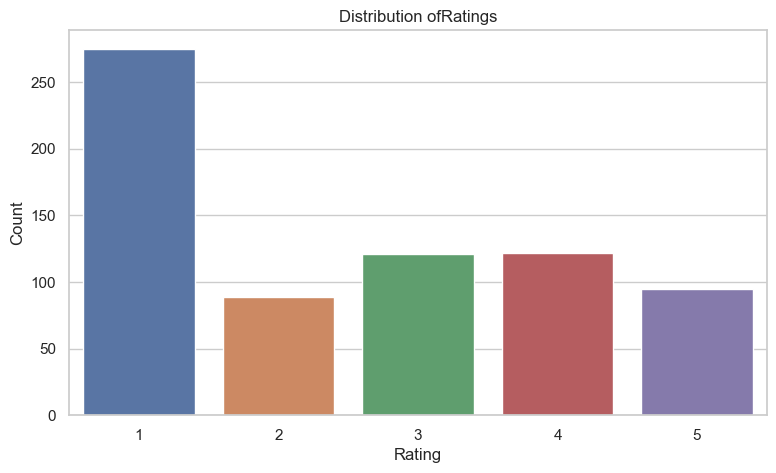

In [24]:
sns. set(style = 'whitegrid')
plt.figure(figsize = (9,5))
sns. countplot(data = df, x ='Rating')
plt.title('Distribution ofRatings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# adding sentiment labels in the data

# we will use textblob library. textblob provides a polarity scores ranning from -1(very negative) to 1 (very positive) for a given text . we can use this score to classify each reviews sentiment as positive, negative or neutral.

!pip install textblob

In [25]:
!pip install textblob

In [26]:
from textblob import TextBlob

In [27]:
def textblob_sentiment_analysis(review):
    sentiment = TextBlob(review).sentiment
    if sentiment.polarity > 0.1 :
        return 'Positive'
    elif sentiment.polarity < -0.1 :
        return 'Negative'
    else :
        return 'Neutral' 
    

In [28]:
df['Sentiment'] = df['Review'].apply(textblob_sentiment_analysis) 

In [12]:
df.sample(5)

,Review,Rating
454,Worked before the upgrade. Very disappointed.,1
469,"Like that they tried to make or user friendly,...",3
525,Much nicer than the previous version,4
135,"Very limited, can't see group discussions.",2
507,Really hate this update. Like old interface be...,2


# analyzing app reviews sentiments

In [29]:
sentiment_distribution = df['Sentiment'].value_counts()
sentiment_distribution

Sentiment
Positive    298
Neutral     297
Negative    107
Name: count, dtype: int64

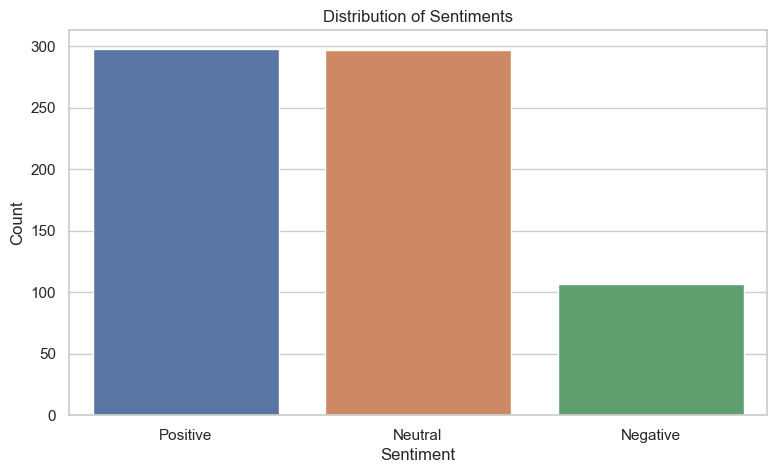

In [15]:
plt.figure(figsize = (9,5))
sns.barplot(x = sentiment_distribution.index,
            y = sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()            

# so , we can see althrough the app has low ratings, still the reviews don't use many negative words in the reviews of the app

# next ,we'll explore the relationship between the sentiments and the ratings . this analysis can help us understand whether there is a correction betwwen the  sentiment of the text and numerical ratings.


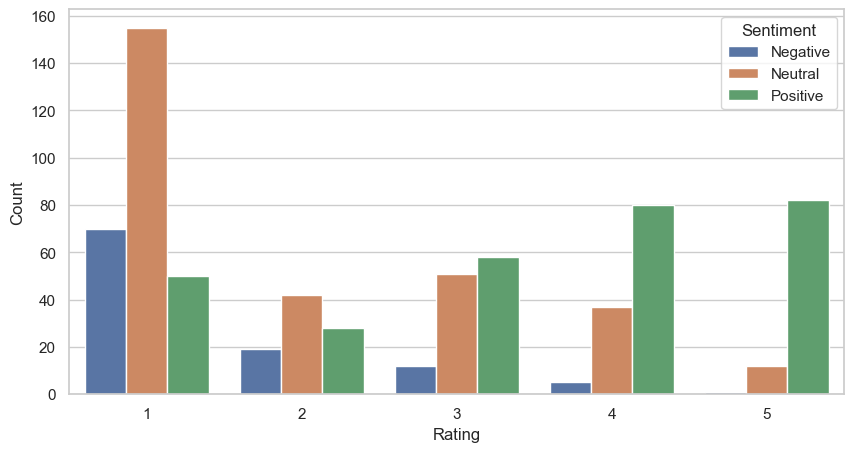

In [30]:
plt.figure(figsize = (10,5))
sns.countplot(data = df,
              x = 'Rating',
              hue = 'Sentiment')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

# Now let's perform a text analysis to identify common words or themes within each sentiment category . It involves examining the most frequently occuring words in positive , negative and neutral reviews using a wordcloud.

In [33]:
from wordcloud import WordCloud 

ModuleNotFoundError: No module named 'wordcloud'

In [35]:
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in df[df['Sentiment'] == sentiment]['Review'])
    wordcloud = WordCloud(width=800,height=400,background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()
    
    
#Generating word clouds for each sentiment 
for sentiment in ['Positive' , 'Negative' , 'Neutral']:
    generate_word_cloud(sentiment)

NameError: name 'WordCloud' is not defined